**House price prediction**

- **step-1**
- **import the necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- **step-2**
- **Read the file**

In [2]:
file_path="D:\\DATA SCIENCE-INTERNSHIPS\\TECHNO-HACKS INTERNSHIP PROGRAM\\DATASETS\\HOUSE PRICE PREDICTIONS\\kc_house_data.csv"
house_df=pd.read_csv(file_path)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house_df.shape

(21613, 21)

In [4]:
house_df.size

453873

In [5]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There no missing values 

In [10]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**working on date column**

In [11]:
house_df["date"]=pd.to_datetime(house_df["date"]) #chaning the object to datetime 
house_df["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.0 KB


**Step-3 EDA**

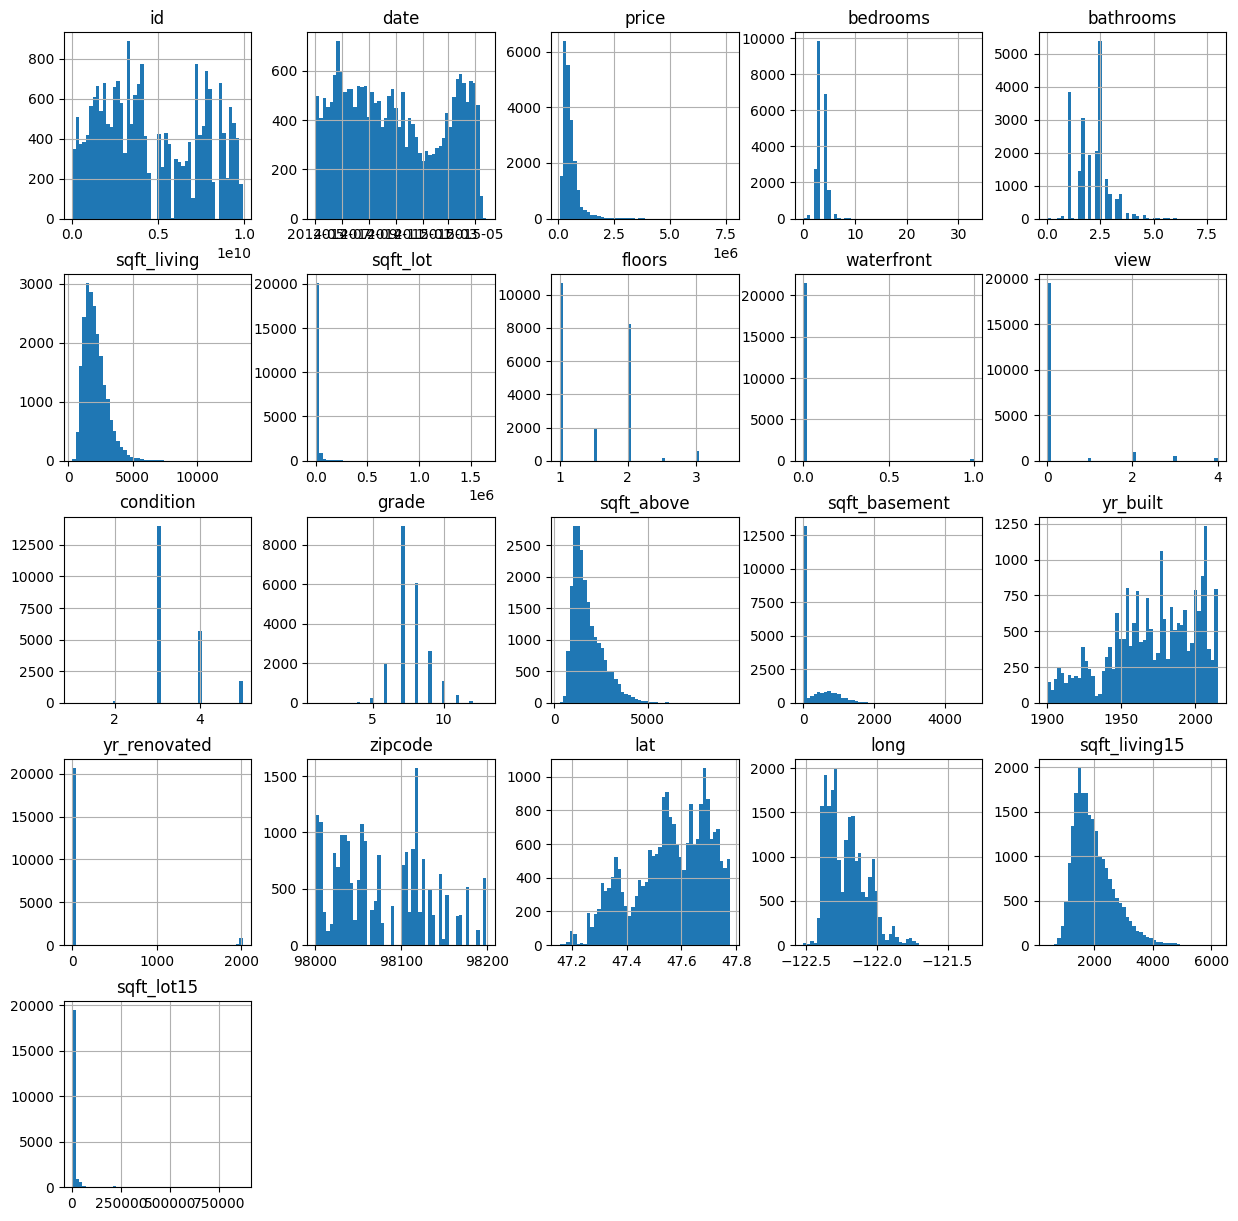

In [12]:
house_df.hist(bins=50,figsize=(15,15))
plt.show()

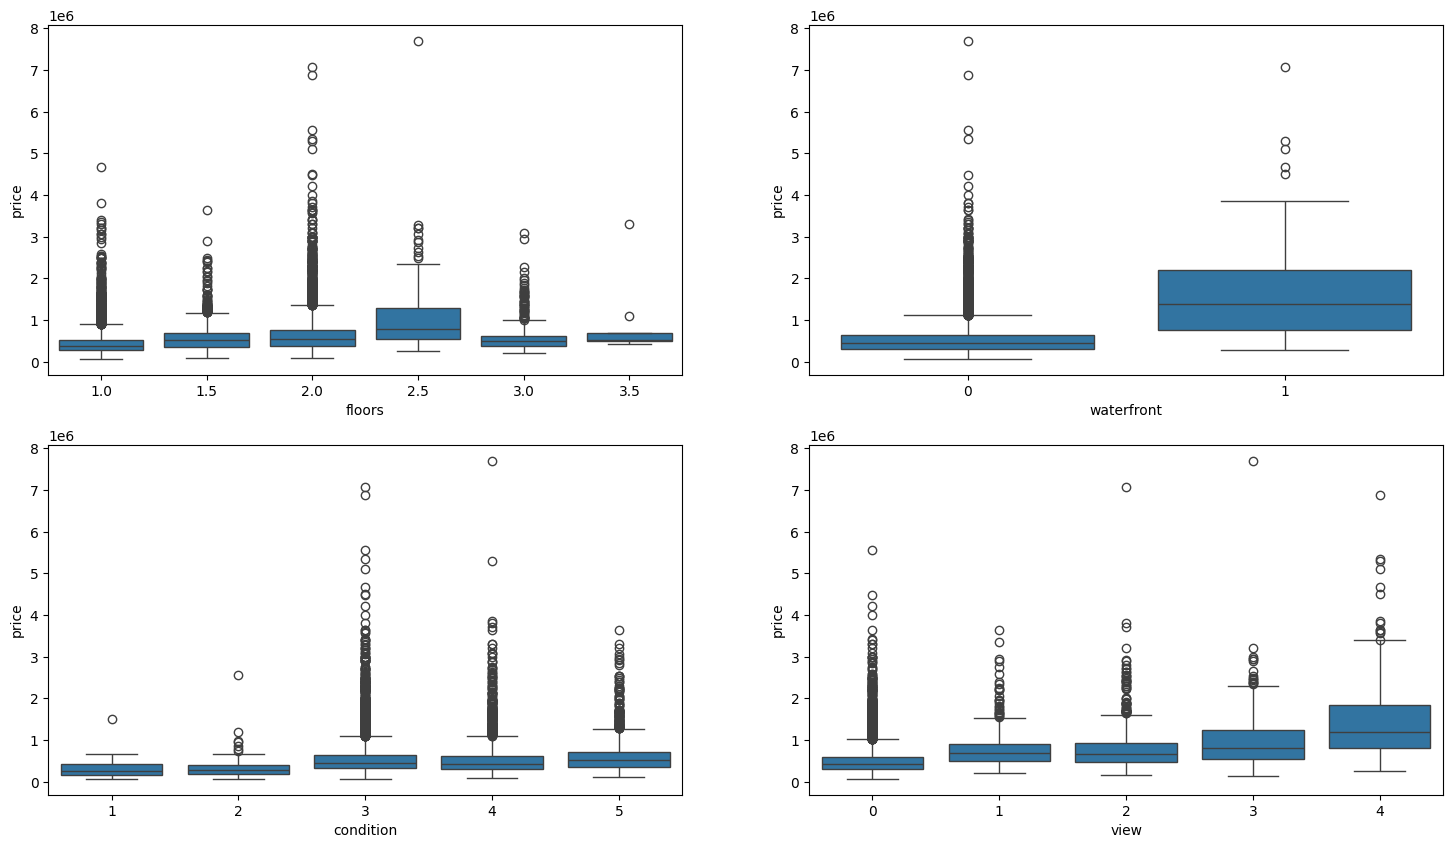

In [13]:
fig, axes = plt.subplots(2,2, figsize=(18, 10))
#fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0, 0], data=house_df, x='floors', y='price')
sns.boxplot(ax=axes[0, 1], data=house_df, x='waterfront', y='price')
sns.boxplot(ax=axes[1, 0], data=house_df, x='condition', y='price')
sns.boxplot(ax=axes[1, 1], data=house_df, x='view', y='price')
plt.show()

**correlation**

<Axes: >

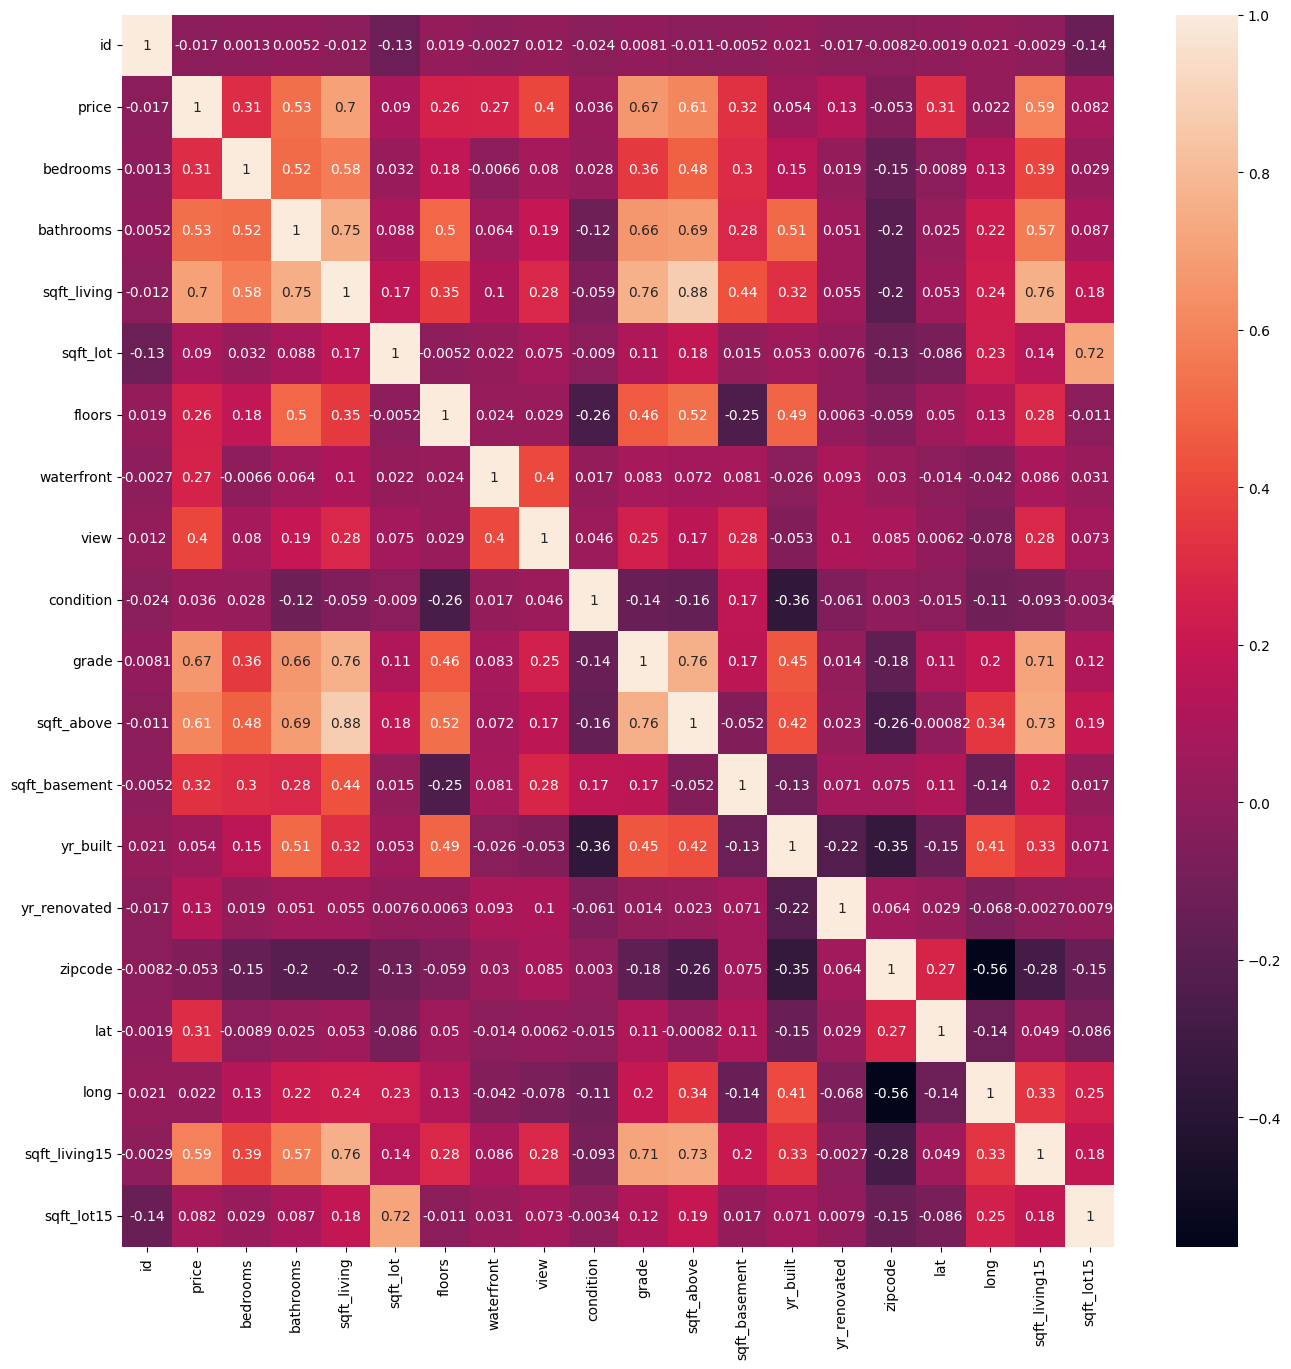

In [14]:
plt.figure(figsize=(16,16))
data=house_df.corr(numeric_only=True)
sns.heatmap(data,annot=True)

**squt_living and sqft_above have the more correlation is 0.88**

**correlation with the target variable**

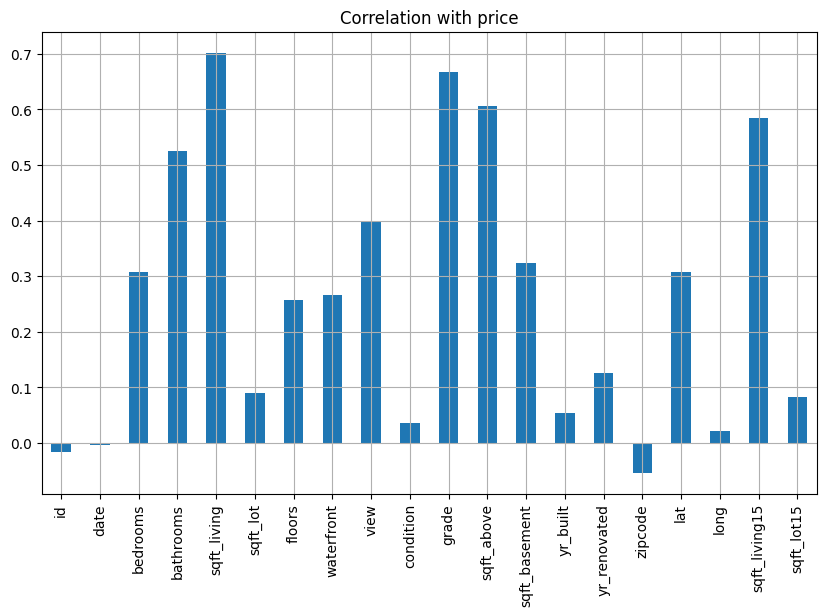

In [15]:
correlation_values = house_df.drop('price', axis=1).corrwith(house_df['price'])
correlation_values.plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with price")
plt.show()

In [16]:
#normlaize  the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
for i in house_df:
        SS=MinMaxScaler()
        house_df[i]=SS.fit_transform(house_df[[i]])

In [18]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.420513,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.566667,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.766667,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.566667,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.748718,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,0.048718,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,0.666639,0.761538,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,0.153783,0.133333,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,0.029327,0.664103,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


In [19]:
X=house_df.drop(["price","date","id"],axis=1)
y=house_df["price"]
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"the shape of x_train is : {X_train.shape}")
print(f'the shape of x_test is : {X_test.shape}')
print(f'the shape of y_train is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (17290, 18)
the shape of x_test is : (4323, 18)
the shape of y_train is : (17290,)
the shape of y_test is (4323,)


In [20]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,y)
LR

LinearRegression()

In [21]:
y_predictions=LR.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_test,y_predictions)
mse=mean_squared_error(y_test,y_predictions)
print("The r2 error is",r2)

print("mean abbsolute error is",mse)

The r2 error is 0.7022082101886487
mean abbsolute error is 0.000774315441582628


In [23]:
y_test.values[:5]


array([0.03803279, 0.10360656, 0.12629508, 0.18557377, 0.08340984])

In [24]:
y_predictions[:5]

array([0.05073097, 0.08915003, 0.15351412, 0.20947295, 0.08692553])